In [1]:
import sys

In [2]:
%pylab inline
import pandas as pd
import catboost as cat

Populating the interactive namespace from numpy and matplotlib


# xg

In [4]:
params= !ls *param*.csv|grep xg
params

['xgb_params.reg-l1f0.grid1.csv',
 'xgb_params.reg-l1f0.grid2.csv',
 'xgb_params.reg-l1f1.grid1.csv',
 'xgb_params.reg-l1f2.grid1.csv',
 'xgb_params.reg-l1f4.grid1.csv',
 'xgb_params.reg-l1f6.grid1.csv',
 'xgb_params.reg-l1f7.grid1.csv']

In [5]:
keys=['f0','f1','f2','f4','f6','f7']

In [73]:
def f(k,n=10):
    files=[u for u in params if k in u]
    print k,files
    df=pd.concat([pd.read_csv(u,index_col=0) for u in files]).sort_values("score")
    df['params']=df['params'].map(lambda u: eval(u))
    df['percent']=df['score']/df['score'].min()
    print df.shape
    plt.hist(df['percent']);plt.show()
    pdf=pd.DataFrame(dict(enumerate(df[:n]['params'].map(lambda u: pd.Series(u)).values))).T
    pdf['score']=df[:n]['score'].values
    display(pdf)
    param={}
    for col in pdf.columns:
        if col=='score': continue
        vc=pdf[col].value_counts().sort_values(ascending=False)
        param[str(col)]=vc.index[0]
    return param

In [83]:
xg_params={}

f0 ['xgb_params.reg-l1f0.grid1.csv', 'xgb_params.reg-l1f0.grid2.csv']
(120, 3)


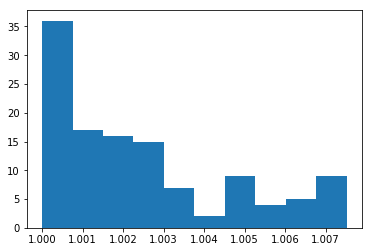

colsample_bytree learning_rate max_depth min_child_weight objective  \
0              0.7          0.01         4                1  reg:l1f0   
1                1          0.01         4              0.1  reg:l1f0   
2              0.7          0.01         4              0.1  reg:l1f0   
3              0.5          0.01         4                1  reg:l1f0   
4                1          0.01         4              0.1  reg:l1f0   
5                1          0.01         4                2  reg:l1f0   
6              0.5          0.01         4              0.1  reg:l1f0   
7              0.5          0.01         4                2  reg:l1f0   
8              0.5          0.01         4              0.1  reg:l1f0   
9                1          0.01         4                1  reg:l1f0   

  subsample     score  
0       0.8  0.067870  
1       0.8  0.067879  
2       0.8  0.067881  
3       0.8  0.067883  
4       0.8  0.067884  
5       0.8  0.067887  
6       0.8  0.067888  
7       0.8  0.067888  
8       0.8  0.067888  
9       0.8  0.067888

In [80]:
i=0
key=keys[i]
param=f(keys[i])

In [84]:
param['colsample_bytree']=1
xg_params[key]=param
param

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 0.10000000000000001,
 'objective': 'reg:l1f0',
 'subsample': 0.80000000000000004}

f1 ['xgb_params.reg-l1f1.grid1.csv']
(324, 3)


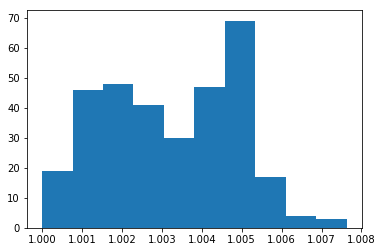

C colsample_bytree learning_rate max_depth min_child_weight objective  \
0  0.001              0.5          0.01         8                2  reg:l1f1   
1  0.001                1          0.03         4                2  reg:l1f1   
2  0.001              0.5          0.01         6                2  reg:l1f1   
3  0.001              0.7          0.03         4                2  reg:l1f1   
4  0.001              0.7          0.01         4                2  reg:l1f1   
5  0.001              0.5          0.01         4                2  reg:l1f1   
6   0.01              0.5          0.01         6                2  reg:l1f1   
7  0.001              0.5          0.01         8                2  reg:l1f1   
8  0.001              0.5          0.03         4                2  reg:l1f1   
9  0.001              0.5          0.01         4                2  reg:l1f1   

  subsample     score  
0       0.8  0.068034  
1         1  0.068040  
2       0.8  0.068044  
3         1  0.068046  
4         1  0.068047  
5         1  0.068048  
6       0.8  0.068049  
7         1  0.068057  
8         1  0.068058  
9       0.8  0.068060

In [87]:
i=1
key=keys[i]
param=f(keys[i])

In [88]:
xg_params[key]=param
param

{'C': 0.001,
 'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 2,
 'objective': 'reg:l1f1',
 'subsample': 1.0}

f2 ['xgb_params.reg-l1f2.grid1.csv']
(324, 3)


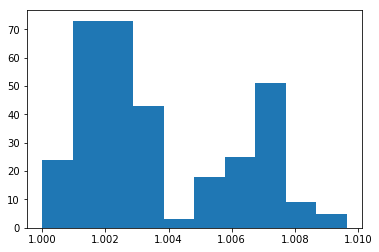

C colsample_bytree learning_rate max_depth min_child_weight objective  \
0  0.01              0.7          0.01         8                2  reg:l1f2   
1  0.01              0.5          0.01         8                2  reg:l1f2   
2  0.01              0.5          0.01         6                2  reg:l1f2   
3  0.01              0.5          0.01         8                2  reg:l1f2   
4  0.01              0.7          0.01         8                1  reg:l1f2   
5  0.01                1          0.01         8                2  reg:l1f2   
6  0.01              0.5          0.01         6                1  reg:l1f2   
7  0.01                1          0.01         8                1  reg:l1f2   
8  0.01              0.7          0.01         6                2  reg:l1f2   
9  0.01              0.5          0.01         8                1  reg:l1f2   

  subsample     score  
0       0.8  0.067947  
1       0.8  0.067950  
2       0.8  0.067966  
3         1  0.067971  
4       0.8  0.067974  
5       0.8  0.067975  
6       0.8  0.067977  
7       0.8  0.067980  
8       0.8  0.067981  
9       0.8  0.067981

In [89]:
i=2
key=keys[i]
param=f(keys[i])

In [90]:
xg_params[key]=param
param

{'C': 0.01,
 'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 2,
 'objective': 'reg:l1f2',
 'subsample': 0.80000000000000004}

f4 ['xgb_params.reg-l1f4.grid1.csv']
(324, 3)


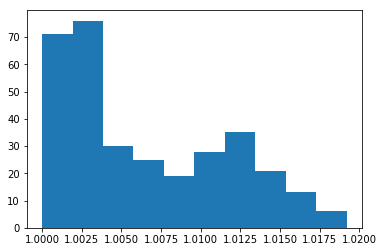

C colsample_bytree learning_rate max_depth min_child_weight objective  \
0   0.1              0.5          0.01         6                2  reg:l1f4   
1   0.1              0.5          0.01         8                2  reg:l1f4   
2  0.01                1          0.01         4                2  reg:l1f4   
3   0.1              0.5          0.01         8                2  reg:l1f4   
4   0.1              0.5          0.01         6                2  reg:l1f4   
5   0.1              0.5          0.03         6                2  reg:l1f4   
6  0.01              0.5          0.01         4                2  reg:l1f4   
7   0.1              0.5          0.03         4                2  reg:l1f4   
8   0.1              0.7          0.01         6                2  reg:l1f4   
9   0.1              0.7          0.01         8                2  reg:l1f4   

  subsample     score  
0       0.8  0.068049  
1         1  0.068051  
2         1  0.068069  
3       0.8  0.068073  
4         1  0.068077  
5         1  0.068086  
6         1  0.068087  
7         1  0.068090  
8       0.8  0.068091  
9       0.8  0.068094

In [94]:
i=3
key=keys[i]
param=f(keys[i])

In [95]:
xg_params[key]=param
param

{'C': 0.10000000000000001,
 'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 2,
 'objective': 'reg:l1f4',
 'subsample': 1.0}

f6 ['xgb_params.reg-l1f6.grid1.csv']
(324, 3)


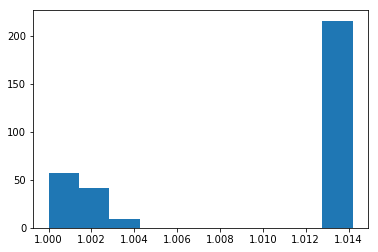

C colsample_bytree learning_rate max_depth min_child_weight objective  \
0  0.1                1          0.01         8                2  reg:l1f6   
1  0.1                1          0.01         8              0.1  reg:l1f6   
2  0.1              0.7          0.01         8                2  reg:l1f6   
3  0.1              0.7          0.01         8              0.1  reg:l1f6   
4  0.1              0.7          0.01         8                1  reg:l1f6   
5  0.1                1          0.03         8              0.1  reg:l1f6   
6  0.1                1          0.03         8                2  reg:l1f6   
7  0.1                1          0.01         8                1  reg:l1f6   
8  0.1              0.5          0.01         8                2  reg:l1f6   
9  0.1              0.5          0.03         6                1  reg:l1f6   

  subsample     score  
0       0.8  0.067896  
1       0.8  0.067896  
2       0.8  0.067899  
3       0.8  0.067904  
4       0.8  0.067907  
5       0.8  0.067908  
6       0.8  0.067910  
7       0.8  0.067911  
8       0.8  0.067916  
9       0.8  0.067918

In [91]:
i=4
key=keys[i]
param=f(keys[i])

In [92]:
xg_params[key]=param
param

{'C': 0.10000000000000001,
 'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 2.0,
 'objective': 'reg:l1f6',
 'subsample': 0.80000000000000004}

In [96]:
i=5
key=keys[i]
param=f(keys[i])

f7 ['xgb_params.reg-l1f7.grid1.csv']
(324, 3)


C colsample_bytree learning_rate max_depth min_child_weight objective  \
0  0.001              0.5          0.03         8              0.1  reg:l1f7   
1  0.001              0.5          0.03         8                2  reg:l1f7   
2  0.001                1          0.03         8              0.1  reg:l1f7   
3  0.001                1          0.03         8                1  reg:l1f7   
4  0.001                1          0.01         8              0.1  reg:l1f7   
5  0.001                1          0.03         6              0.1  reg:l1f7   
6  0.001                1          0.03         6                1  reg:l1f7   
7   0.01              0.7          0.01         8                1  reg:l1f7   
8  0.001              0.7          0.03         6              0.1  reg:l1f7   
9   0.01              0.7          0.03         8                2  reg:l1f7   

  subsample     score  
0       0.8  0.067685  
1       0.8  0.067690  
2       0.8  0.067694  
3       0.8  0.067699  
4       0.8  0.067700  
5       0.8  0.067705  
6       0.8  0.067707  
7       0.8  0.067708  
8       0.8  0.067708  
9       0.8  0.067710

In [97]:
xg_params[key]=param
param

{'C': 0.001,
 'colsample_bytree': 1.0,
 'learning_rate': 0.029999999999999999,
 'max_depth': 8,
 'min_child_weight': 0.10000000000000001,
 'objective': 'reg:l1f7',
 'subsample': 0.80000000000000004}

In [99]:
len(xg_params),len(keys)

(6, 6)

In [100]:
xg_params

{'f0': {'colsample_bytree': 1,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 0.10000000000000001,
  'objective': 'reg:l1f0',
  'subsample': 0.80000000000000004},
 'f1': {'C': 0.001,
  'colsample_bytree': 0.5,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 2,
  'objective': 'reg:l1f1',
  'subsample': 1.0},
 'f2': {'C': 0.01,
  'colsample_bytree': 0.5,
  'learning_rate': 0.01,
  'max_depth': 8,
  'min_child_weight': 2,
  'objective': 'reg:l1f2',
  'subsample': 0.80000000000000004},
 'f4': {'C': 0.10000000000000001,
  'colsample_bytree': 0.5,
  'learning_rate': 0.01,
  'max_depth': 6,
  'min_child_weight': 2,
  'objective': 'reg:l1f4',
  'subsample': 1.0},
 'f6': {'C': 0.10000000000000001,
  'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 8,
  'min_child_weight': 2.0,
  'objective': 'reg:l1f6',
  'subsample': 0.80000000000000004},
 'f7': {'C': 0.001,
  'colsample_bytree': 1.0,
  'learning_rate': 0.029999999999999999,
  'max_depth': 8,


In [101]:
import cPickle as pickle

In [102]:
pickle.dump(xg_params,open("xg_params.pkl",'wb'))